# 대회 목적
competition dataset에는 public domain의 spooky authors(으스스한 작가)가 쓴 소설의 텍스트가 포함되어 있음.

1. Edgar Allan Poe (EAP)
2. HP Lovecraft (HPL)
3. Mary Wollstonecraft Shelley (MWS)

# notebook 목적
spooky authors를 식별하는데 도움이 되는 different features를 만들기

feature engineering part를 살펴보기 전에 몇가지 basic data visualization and cleaning 수행.

# 패키지 및 라이브러리


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# nltk.download('all') # nltk 패키지 다운로드 후 아래코드 실행

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\wjs545\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\wjs545\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\wjs545\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\wjs545\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\wjs545\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_dat

[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\wjs545\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\wjs545\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nps_chat.zip.
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\wjs545\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\omw.zip.
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\wjs545\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\omw-1.4.zip.
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\wjs545\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\wjs545\AppData\Roaming\nltk_data...
[nltk_data]    | Downlo

[nltk_data]    |   Unzipping corpora\verbnet.zip.
[nltk_data]    | Downloading package verbnet3 to
[nltk_data]    |     C:\Users\wjs545\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\verbnet3.zip.
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\wjs545\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\webtext.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\wjs545\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\wjs545\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\word2vec_sample.zip.
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\wjs545\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\wordnet.zip.
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\wjs545\AppData\Roaming\nlt

True

In [2]:
from nltk.corpus import stopwords # nltk.download()를 하지 않으면 lookup error
import string
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import ensemble, metrics, model_selection, naive_bayes
color = sns.color_palette()

%matplotlib inline

eng_stopwords = set(stopwords.words("english"))
pd.options.mode.chained_assignment = None

# 데이터 불러오기

In [3]:
## Read the train and test dataset and check the top few lines ##
train_df = pd.read_csv("C:\\Coding\\Kaggle_data\\Spooky Author\\train.csv")
test_df = pd.read_csv("C:\\Coding\\Kaggle_data\\Spooky Author\\test.csv")
print("Number of rows in train dataset : ",train_df.shape[0])
print("Number of rows in test dataset : ",test_df.shape[0])

Number of rows in train dataset :  19579
Number of rows in test dataset :  8392


In [4]:
train_df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


각 저자의 출현 횟수를 확인해서 클래스가 균형을 이루고 있는지 확인 가능

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64


C:\Users\wjs545\.conda\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


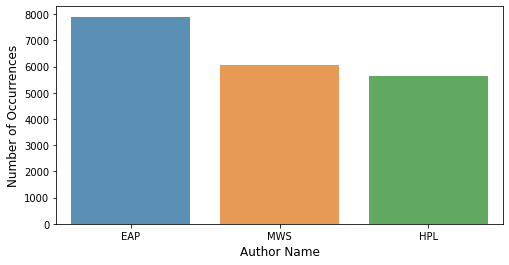

In [6]:
cnt_srs = train_df['author'].value_counts()
print(cnt_srs)

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Author Name', fontsize=12)
plt.show()

- class 불균형이 별로 없음.(조금 차이는 있음)
- 각 저자의 글 style을 이해하고 몇 줄을 print

In [7]:
grouped_df = train_df.groupby('author')
for name, group in grouped_df:
    print("Author name : ", name)
    cnt = 0
    for ind, row in group.iterrows():
        print(row["text"])
        cnt += 1
        if cnt == 5:
            break
    print("\n")

Author name :  EAP
This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.
In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.
The astronomer, perhaps, at this point, took refuge in the suggestion of non luminosity; and here analogy was suddenly let fall.
The surcingle hung in ribands from my body.
I knew that you could not say to yourself 'stereotomy' without being brought to think of atomies, and thus of the theories of Epicurus; and since, when we discussed this subject not very long ago, I mentioned to you how singularly, yet with how little notice, the vague guesses of that noble Greek had met with confirmation in the late nebular cosmogony, I felt that you coul

- 텍스트상에 특수문자가 많음. 추후 특수 문자의 수를 가지고 feature engineering을 시도해보려는듯

# Feature Engineering
2가지 주요 부분으로 나눔.
1. Meta features : 
- number of words, number of stop words, number of punctuations(구두점) 등과 같은 텍스트에서 추출된 기능
---


2. Text based feature : 아래와 같은 Text/word를 직접 기반으로 하는 기능
- word like frequency : 여기서는 단어의 빈도수를 의미하는거 같음
- svd : 여기서 svd는 특이값 분해인지 아래에서 확인필요
- word2vec

## Meta feature
- Meta feature create
- spooky authors prediction
- feature list는 다음과 같음
1. Number of words in the text
2. Number of unique words in the text(고유한 단어)
3. Number of characters in the text(특징)
4. Number of stopwords(불용어)
5. Number of punctuations(구두점)
6. Number of upper case words(대문자)
7. Number of title case words(타이틀 or 제목)
8. Average length of the words

In [8]:
## Number of words in the text ##
train_df["num_words"] = train_df["text"].apply(lambda x: len(str(x).split()))
test_df["num_words"] = test_df["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
train_df["num_unique_words"] = train_df["text"].apply(lambda x: len(set(str(x).split())))
test_df["num_unique_words"] = test_df["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
train_df["num_chars"] = train_df["text"].apply(lambda x: len(str(x)))
test_df["num_chars"] = test_df["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
train_df["num_stopwords"] = train_df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
test_df["num_stopwords"] = test_df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

## Number of punctuations in the text ##
train_df["num_punctuations"] =train_df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
test_df["num_punctuations"] =test_df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
train_df["num_words_upper"] = train_df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
test_df["num_words_upper"] = test_df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
train_df["num_words_title"] = train_df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
test_df["num_words_title"] = test_df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
train_df["mean_word_len"] = train_df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test_df["mean_word_len"] = test_df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

- lower() : 대문자를 소문자로
- split() : 구분자를 기준으로 문자열을 나누고 리스트로 반환

예측에 도움이 되는 몇가지 변수들을 시각화

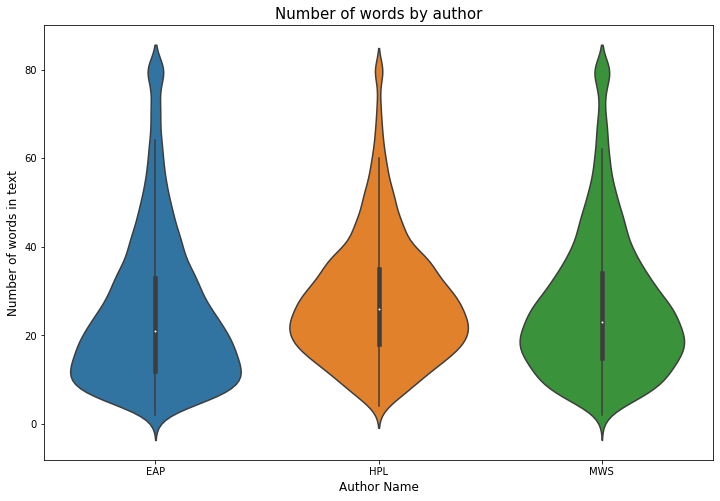

In [9]:
train_df['num_words'].loc[train_df['num_words']>80] = 80 # truncation for better visuals
plt.figure(figsize=(12,8))
sns.violinplot(x='author', y='num_words', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of words in text', fontsize=12)
plt.title("Number of words by author", fontsize=15)
plt.show()

EAP는 MWS 및 HPL보다 단어 수가 약간 적은 것 같습니다.

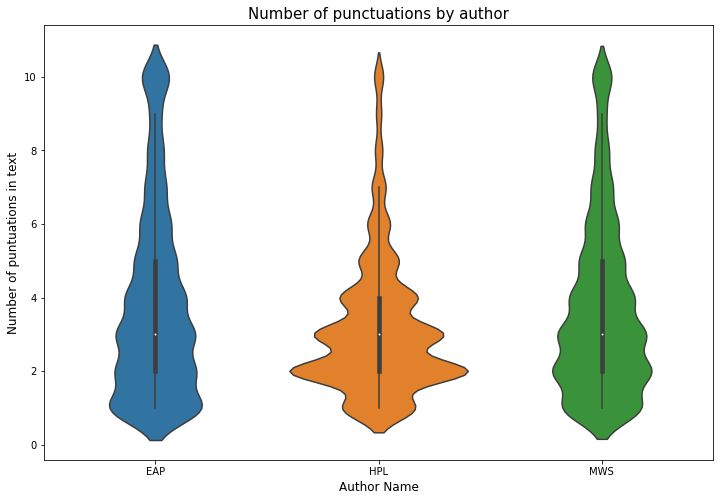

In [10]:
train_df['num_punctuations'].loc[train_df['num_punctuations']>10] = 10 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.violinplot(x='author', y='num_punctuations', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of puntuations in text', fontsize=12)
plt.title("Number of punctuations by author", fontsize=15)
plt.show()

- create some text based features : 텍스트 기반의 features 만들기
- build a basic model : Meta feature가 어떻게 도움되는지 알아보기 위해 사용

In [11]:
## Prepare the data for modeling ###
author_mapping_dict = {'EAP':0, 'HPL':1, 'MWS':2}
train_y = train_df['author'].map(author_mapping_dict)
train_id = train_df['id'].values
test_id = test_df['id'].values

In [13]:
train_y # train_df['author']에 maping 하였음.

0        0
1        1
2        0
3        2
4        1
        ..
19574    0
19575    0
19576    0
19577    0
19578    1
Name: author, Length: 19579, dtype: int64

In [27]:
print(train_df['id'])
print('--'*35)
print(train_id) # type ndarray

0        id26305
1        id17569
2        id11008
3        id27763
4        id12958
          ...   
19574    id17718
19575    id08973
19576    id05267
19577    id17513
19578    id00393
Name: id, Length: 19579, dtype: object
----------------------------------------------------------------------
['id26305' 'id17569' 'id11008' ... 'id05267' 'id17513' 'id00393']


In [28]:
### recompute the trauncated variables again ###
train_df["num_words"] = train_df["text"].apply(lambda x: len(str(x).split()))
test_df["num_words"] = test_df["text"].apply(lambda x: len(str(x).split()))
train_df["mean_word_len"] = train_df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test_df["mean_word_len"] = test_df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

cols_to_drop = ['id', 'text']
train_X = train_df.drop(cols_to_drop+['author'], axis=1)
test_X = test_df.drop(cols_to_drop, axis=1)

In [29]:
cols_to_drop

['id', 'text']

In [30]:
cols_to_drop+['author']

['id', 'text', 'author']

# create model (with XGBoost)

이러한 메타 기능만으로 간단한 XGBoost 모델을 훈련할 수 있습니다.

In [33]:
def runXGB(train_X, train_y, test_X, test_y=None, test_X2=None, seed_val=0, child=1, colsample=0.3):
    param = {}
    param['objective'] = 'multi:softprob'
    param['eta'] = 0.1
    param['max_depth'] = 3
    param['silent'] = 1
    param['num_class'] = 3
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = child
    param['subsample'] = 0.8
    param['colsample_bytree'] = colsample
    param['seed'] = seed_val
    num_rounds = 2000

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y) 

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=50, verbose_eval=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest, ntree_limit = model.best_ntree_limit)
    if test_X2 is not None:
        xgtest2 = xgb.DMatrix(test_X2)
        pred_test_y2 = model.predict(xgtest2, ntree_limit = model.best_ntree_limit)
    return pred_test_y, pred_test_y2, model

DMatrix : 
- numpy를 입력값으로 받음. XGBoost 전용 데이터셋.
- 주요 input parameter는 data와 label

ntree_limit = model.ntree_limit :
- prediction을 계산할 떄 사용할 모델의 tree 수를 선택

kernel run time을 위해 k-fold cross validation score의 첫 번째 fold만 확인가능

In [34]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train_df.shape[0], 3])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index], train_X.loc[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runXGB(dev_X, dev_y, val_X, val_y, test_X, seed_val=0)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
    break
print("cv scores : ", cv_scores)

[12:25:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.09383	test-mlogloss:1.09472
[20]	train-mlogloss:1.04663	test-mlogloss:1.05720
[40]	train-mlogloss:1.02368	test-mlogloss:1.03845
[60]	train-mlogloss:1.01109	test-mlogloss:1.02949
[80]	train-mlogloss:0.99824	test-mlogloss:1.01957
[100]	train-mlogloss:0.98938	test-mlogloss:1.01345
[120]	train-mlogloss:0.98209	test-mlogloss:1.00860
[140]	train-mlogloss:0.97603	test-mlogloss:1.00505
[160]	train-mlogloss:0.97088	test-mlogloss:1.00237
[180]	train-mlogloss:0.96619	test-mlogloss:1.00040
[200]	train-mlogloss:0.96141	test-mlogloss:0.99788
[220]	train-mlogloss:0.95745	t

C:\Users\wjs545\.conda\envs\ml\lib\site-packages\xgboost\core.py:108: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  UserWarning


- Meta feature만 사용해서 0.988의 mlogloss를 얻었음.

# Feature important

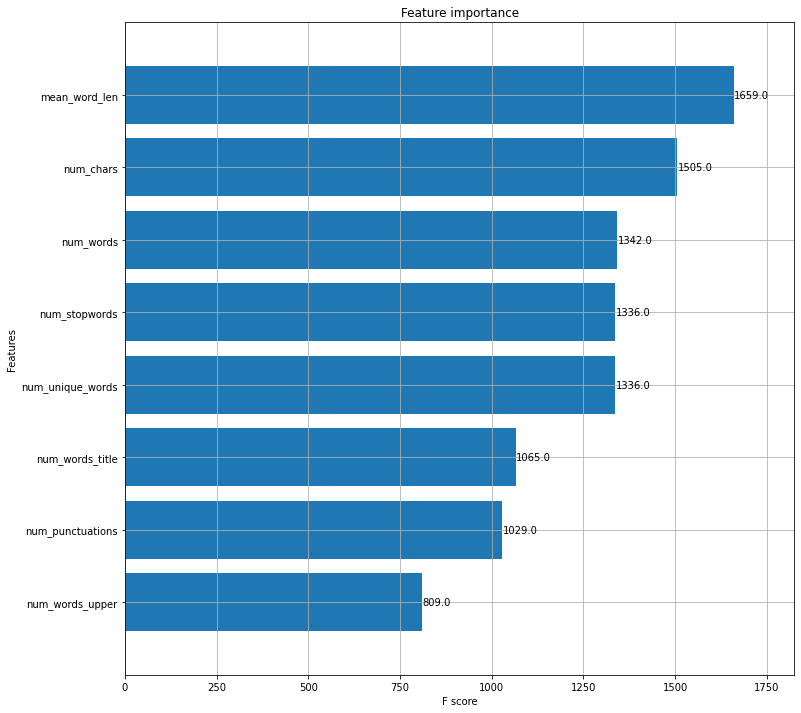

In [35]:
### Plot the important variables ###
fig, ax = plt.subplots(figsize=(12,12))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

- mean_word_len, num_chars, num_word : 상위 3개 변수

## Text Based Features 

단어의 tf-idf 사용

In [36]:
### Fit transform the tfidf vectorizer ###
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
full_tfidf = tfidf_vec.fit_transform(train_df['text'].values.tolist() + test_df['text'].values.tolist())
train_tfidf = tfidf_vec.transform(train_df['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test_df['text'].values.tolist())

In [37]:
tfidf_vec

TfidfVectorizer(ngram_range=(1, 3), stop_words='english')

In [38]:
full_tfidf

<27971x550841 sparse matrix of type '<class 'numpy.float64'>'
	with 870395 stored elements in Compressed Sparse Row format>

In [39]:
train_tfidf

<19579x550841 sparse matrix of type '<class 'numpy.float64'>'
	with 611707 stored elements in Compressed Sparse Row format>

tf-tdf vector를 활용할 수 있음.

tf-idf의 output은 sparse matrix 형태이므로 사용하기 위해 몇가지 고려해야할 사항이 있음.
1. tf-idf vectorizer에서 상위 n features를 가져오고 dense format으로 변환하여 다른 feature와 concat할 수 있음.
2. sparse features만 사용해서 모델을 만들고 다른 dense feature과 함께 feature 중에 하나로 predictions을 사용


위 2가지 방법 중 tf-idf의 모든 기능을 사용하는 very good scoring kernels을 사용하면 되기때문에 2번 방법으로 접근할 예정

여기서 Naive Bayes가 여기 dataset에서 더 나은 성능을 보임. train 속도가 더 빠르다고 함

## Naive Bayes on Word Tfidf Vectorizer

In [40]:
def runMNB(train_X, train_y, test_X, test_y, test_X2):
    model = naive_bayes.MultinomialNB()
    model.fit(train_X, train_y)
    pred_test_y = model.predict_proba(test_X)
    pred_test_y2 = model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model

In [41]:
cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train_df.shape[0], 3])
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runMNB(dev_X, dev_y, val_X, val_y, test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))
pred_full_test = pred_full_test / 5.

Mean cv score :  0.8422161983612855


tf-idf vectorizer를 사용해서 0.842의 mlogloss가 나옴.

Meta features 보다 더 좋은 성능이며 confusion matrix로 확인

In [42]:
### Function to create confusion matrix ###
import itertools
from sklearn.metrics import confusion_matrix

### From http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py #
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.                                       ### why?
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

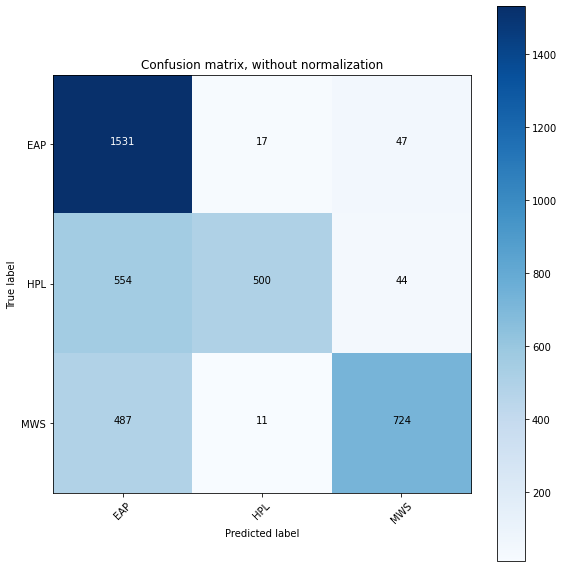

In [43]:
cnf_matrix = confusion_matrix(val_y, np.argmax(pred_val_y,axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=['EAP', 'HPL', 'MWS'],
                      title='Confusion matrix, without normalization')
plt.show()

EAP로 예측되고 해당 클래스에 크게 편향되어 있음.

## SVD on word TFIDF

- tf-idf vectors가 sparse하기 때문에 정보를 압축하고 훨씬 간결하게 표현 가능
- 또다른 방법으로 SVD 사용
- 필자가 과거에 SVD를 사용해서 text 기반의 대회에서 잘 사용했다고 함.
- tf-idf에서 SVD를 만들고 feature set에 추가함

- truncated SVD는 원래의 A가 보존되지 않고 A에 대한 근사행렬 A'가 나오게 됨
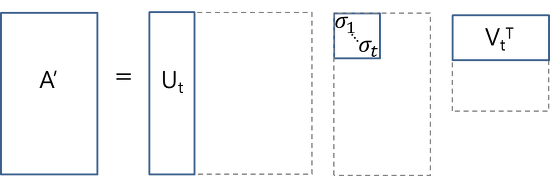

In [44]:
n_comp = 20
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack') # TruncatedSVD 사용
svd_obj.fit(full_tfidf)
train_svd = pd.DataFrame(svd_obj.transform(train_tfidf))
test_svd = pd.DataFrame(svd_obj.transform(test_tfidf))
    
train_svd.columns = ['svd_word_'+str(i) for i in range(n_comp)]
test_svd.columns = ['svd_word_'+str(i) for i in range(n_comp)]
train_df = pd.concat([train_df, train_svd], axis=1)
test_df = pd.concat([test_df, test_svd], axis=1)
del full_tfidf, train_tfidf, test_tfidf, train_svd, test_svd

## Naive Bayes on Word Count Vectorizer

In [45]:
### Fit transform the count vectorizer ###
tfidf_vec = CountVectorizer(stop_words='english', ngram_range=(1,3))
tfidf_vec.fit(train_df['text'].values.tolist() + test_df['text'].values.tolist())
train_tfidf = tfidf_vec.transform(train_df['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test_df['text'].values.tolist())

In [46]:
tfidf_vec 

CountVectorizer(ngram_range=(1, 3), stop_words='english')

In [47]:
train_tfidf

<19579x550841 sparse matrix of type '<class 'numpy.int64'>'
	with 611707 stored elements in Compressed Sparse Row format>

count vectorizer 기반 기능을 사용하여 다항식 NB 모델을 구축

In [48]:
cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train_df.shape[0], 3])
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runMNB(dev_X, dev_y, val_X, val_y, test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))
pred_full_test = pred_full_test / 5.                          ### why?

# add the predictions as new features #
train_df["nb_cvec_eap"] = pred_train[:,0]
train_df["nb_cvec_hpl"] = pred_train[:,1]
train_df["nb_cvec_mws"] = pred_train[:,2]
test_df["nb_cvec_eap"] = pred_full_test[:,0]
test_df["nb_cvec_hpl"] = pred_full_test[:,1]
test_df["nb_cvec_mws"] = pred_full_test[:,2]

Mean cv score :  0.45091841616567435


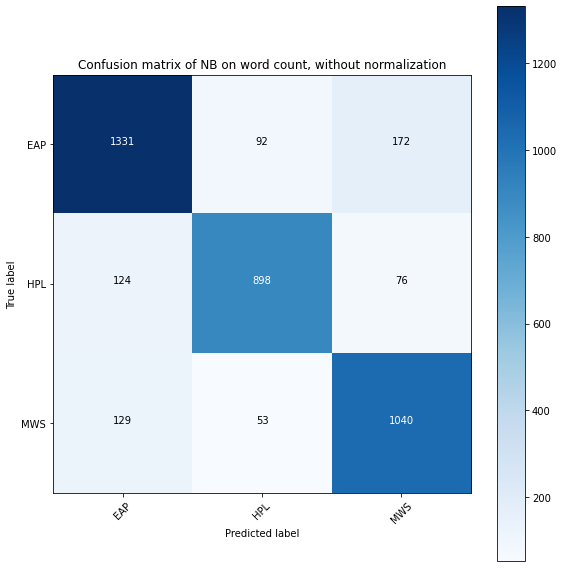

In [49]:
cnf_matrix = confusion_matrix(val_y, np.argmax(pred_val_y,axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=['EAP', 'HPL', 'MWS'],
                      title='Confusion matrix of NB on word count, without normalization')
plt.show()

- tf-idf vectorizer 대신 count vectorizer를 사용해서 0.451의 CV mlogloss를 얻었음
- 이 모델을 사용한 LB score는 0.468.
  * LB score? : Kaggle Leader Board
- 필자는 이전 것보다 훨씬 좋아 보인다고 함
  * why? 어디서 좋아보이는지?

## Naive Bayes on Character Count Vectorizer

- data eyeballing, 특수 문자를 계산하는 것이 도움될 수 있음. 특수 문자를 계산하는 대신 문자 수준에서 count vectorizer를 사용하여 일부 기능을 얻을 수 있음.
  - Eyeballing은 통계계산을 수행하지 않고 데이터 집합을 보고 통계 값을 추정하는 프로세스

In [53]:
### Fit transform the tfidf vectorizer ###
tfidf_vec = CountVectorizer(ngram_range=(1,7), analyzer='char')
tfidf_vec.fit(train_df['text'].values.tolist() + test_df['text'].values.tolist())
train_tfidf = tfidf_vec.transform(train_df['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test_df['text'].values.tolist())

cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train_df.shape[0], 3])
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runMNB(dev_X, dev_y, val_X, val_y, test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print(val_y)
print(pred_val_y)
print("Mean cv score : ", np.mean(cv_scores))
print(cv_scores)
pred_full_test = pred_full_test / 5.

# add the predictions as new features #
train_df["nb_cvec_char_eap"] = pred_train[:,0]
train_df["nb_cvec_char_hpl"] = pred_train[:,1]
train_df["nb_cvec_char_mws"] = pred_train[:,2]
test_df["nb_cvec_char_eap"] = pred_full_test[:,0]
test_df["nb_cvec_char_hpl"] = pred_full_test[:,1]
test_df["nb_cvec_char_mws"] = pred_full_test[:,2]

5        2
6        0
9        2
22       0
24       0
        ..
19515    2
19522    1
19537    2
19538    1
19573    2
Name: author, Length: 3915, dtype: int64
[[1.59e-075 3.41e-264 1.00e+000]
 [1.00e+000 7.61e-087 2.68e-102]
 [1.03e-015 1.50e-049 1.00e+000]
 ...
 [6.17e-010 7.47e-094 1.00e+000]
 [3.44e-016 1.00e+000 2.69e-027]
 [3.68e-050 1.82e-067 1.00e+000]]
Mean cv score :  3.7507639226818825
[3.616192621274845, 3.764785034928723, 3.842295452532883, 3.6286267733454594, 3.9019197313275042]


- CV score 3.75
  - 앞의 방법론과 비교해봤을 때 수치가 엄청 높은편임

## Naive Bayes on Character Tfidf Vectorizer

In [54]:
### Fit transform the tfidf vectorizer ###
tfidf_vec = TfidfVectorizer(ngram_range=(1,5), analyzer='char')
full_tfidf = tfidf_vec.fit_transform(train_df['text'].values.tolist() + test_df['text'].values.tolist())
train_tfidf = tfidf_vec.transform(train_df['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test_df['text'].values.tolist())

cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train_df.shape[0], 3])
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runMNB(dev_X, dev_y, val_X, val_y, test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))
pred_full_test = pred_full_test / 5.

# add the predictions as new features #
train_df["nb_tfidf_char_eap"] = pred_train[:,0]
train_df["nb_tfidf_char_hpl"] = pred_train[:,1]
train_df["nb_tfidf_char_mws"] = pred_train[:,2]
test_df["nb_tfidf_char_eap"] = pred_full_test[:,0]
test_df["nb_tfidf_char_hpl"] = pred_full_test[:,1]
test_df["nb_tfidf_char_mws"] = pred_full_test[:,2]

Mean cv score :  0.790415258947421


## SVD on Character TFIDF

character tf-idf feature에 svd feature를 생성하고 모델링에 사용

In [55]:
n_comp = 20
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
svd_obj.fit(full_tfidf)
train_svd = pd.DataFrame(svd_obj.transform(train_tfidf))
test_svd = pd.DataFrame(svd_obj.transform(test_tfidf))
    
train_svd.columns = ['svd_char_'+str(i) for i in range(n_comp)]
test_svd.columns = ['svd_char_'+str(i) for i in range(n_comp)]
train_df = pd.concat([train_df, train_svd], axis=1)
test_df = pd.concat([test_df, test_svd], axis=1)
del full_tfidf, train_tfidf, test_tfidf, train_svd, test_svd

## XGBoost model

새 변수를 사용해서 XGBoost에 적용 후 결과확인 및 평가

In [56]:
cols_to_drop = ['id', 'text']
train_X = train_df.drop(cols_to_drop+['author'], axis=1)
test_X = test_df.drop(cols_to_drop, axis=1)

kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train_df.shape[0], 3])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index], train_X.loc[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runXGB(dev_X, dev_y, val_X, val_y, test_X, seed_val=0, colsample=0.7)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
    break
print("cv scores : ", cv_scores)

out_df = pd.DataFrame(pred_full_test)
out_df.columns = ['EAP', 'HPL', 'MWS']
out_df.insert(0, 'id', test_id)
out_df.to_csv("sub_fe.csv", index=False)

[18:07:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.00354	test-mlogloss:1.00354
[20]	train-mlogloss:0.40979	test-mlogloss:0.41471
[40]	train-mlogloss:0.33858	test-mlogloss:0.35061
[60]	train-mlogloss:0.31308	test-mlogloss:0.33272
[80]	train-mlogloss:0.29566	test-mlogloss:0.32390
[100]	train-mlogloss:0.28243	test-mlogloss:0.31827
[120]	train-mlogloss:0.27152	test-mlogloss:0.31475
[140]	train-mlogloss:0.26187	test-mlogloss:0.31187
[160]	train-mlogloss:0.25343	test-mlogloss:0.30982
[180]	train-mlogloss:0.24557	test-mlogloss:0.30863
[200]	train-mlogloss:0.23779	test-mlogloss:0.30748
[220]	train-mlogloss:0.23124	t

C:\Users\wjs545\.conda\envs\ml\lib\site-packages\xgboost\core.py:108: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  UserWarning


- val score : 0.3055
- LB score : 필자는 LB score가 0.32x
- all the folds를 사용한다면 더 좋은 score를 얻을 수 있다고 함.

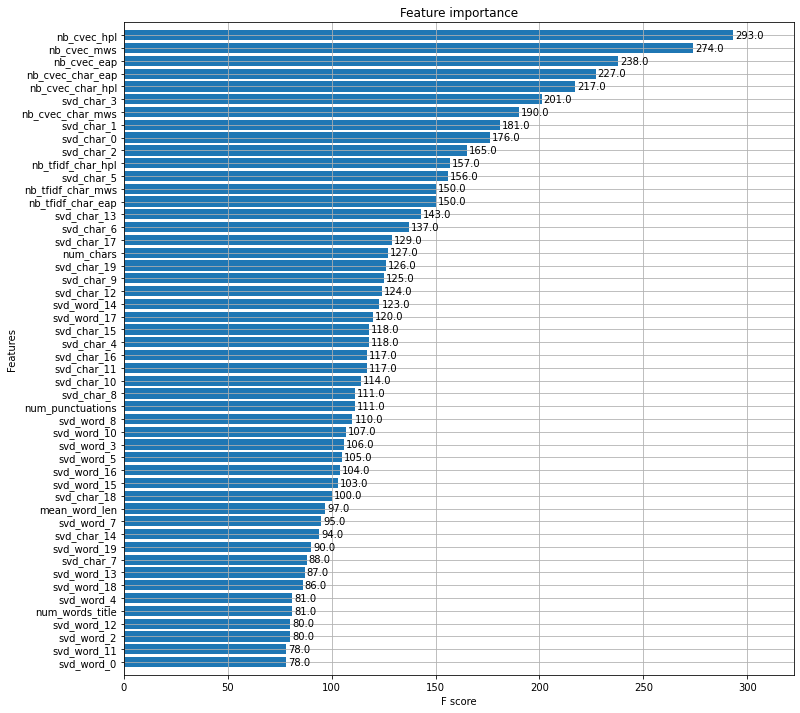

In [57]:
### Plot the important variables ###
fig, ax = plt.subplots(figsize=(12,12))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

misclassification errors(오분류)를 확인하기 위해서 confusion matrix 사용

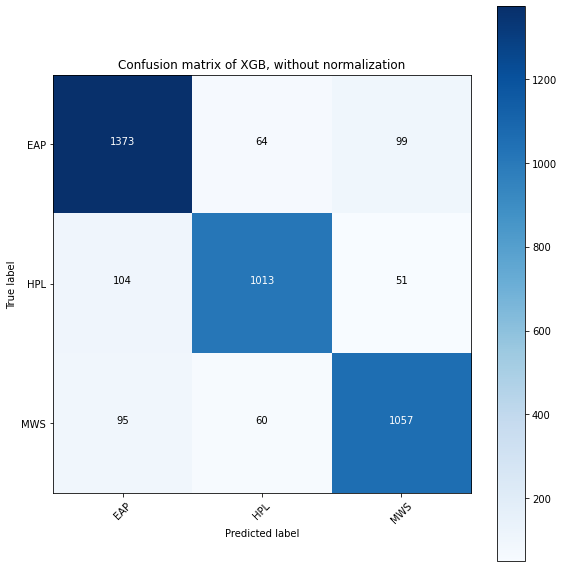

In [58]:
cnf_matrix = confusion_matrix(val_y, np.argmax(pred_val_y,axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=['EAP', 'HPL', 'MWS'],
                      title='Confusion matrix of XGB, without normalization')
plt.show()

# 참고

- nltk : https://wikidocs.net/22488
- nltk.download, lookup error 참고 : https://stackoverflow.com/questions/35861482/nltk-lookup-error
- split : https://wikidocs.net/13
- loc와 iloc : https://gagadi.tistory.com/16
- violinplot 1 : https://codetorial.net/matplotlib/violin_plot.html
- violinplot 2 : https://hleecaster.com/python-seaborn-violinplot/
- XGBoost DMatrix : https://jaaamj.tistory.com/38
- XGBoost ntree_limit stack overflow : https://stackoverflow.com/questions/51955256/xgboost-best-iteration
- XGBoost ntree_limit : https://mljar.com/blog/xgboost-early-stopping/
- DTM : https://wikidocs.net/24559
- TF-IDF : https://soojle.gitbook.io/project/undefined-2/nlp/tf-idf-term-frequency-inverse-document-frequency
- sparse VS dense의 차이 : https://matteding.github.io/2019/04/25/sparse-matrices/
- SVD 설명(공돌이 수학노트) : https://angeloyeo.github.io/2019/08/01/SVD.html
- SVD 설명(다크 프로그래머) : https://darkpgmr.tistory.com/106
- LB score : https://datascience.stackexchange.com/questions/18818/what-is-a-lb-score-in-machine-learning
- mlogloss : http://okminseok.blogspot.com/2017/09/ml-xgboost.html
- negative log likelihod : https://towardsdatascience.com/cross-entropy-negative-log-likelihood-and-all-that-jazz-47a95bd2e81